<a href="https://colab.research.google.com/github/amthreeh/healthnutrition/blob/main/%5Bhr%5D_elderly_people.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

In [3]:
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumBarunGothic


In [4]:
%cd /content/drive/MyDrive/nationalhealth-main

/content/drive/MyDrive/nationalhealth-main


In [5]:
df = pd.read_csv('/content/drive/MyDrive/nationalhealth-main/nationalhealth_2010to2021.csv')

In [164]:
all_df = pd.read_csv('/content/drive/MyDrive/elderly people classification/전체독거노인.csv')
region_old_g = pd.read_csv('/content/drive/MyDrive/elderly people classification/지역별 독거노인들.csv')
region_not_old_g = pd.read_csv('/content/drive/MyDrive/elderly people classification/지역별 독거노인이 아닌사람들.csv')

In [7]:
all_df.columns.tolist()

['Unnamed: 0',
 'ID',
 'ID_fam',
 'year',
 'region',
 'town_t',
 'sex',
 'age',
 'incm',
 'ho_incm',
 'incm5',
 'ho_incm5',
 'edu',
 'occp',
 'cfam',
 'genertn',
 'allownc',
 'marri_1',
 'marri_2',
 'fam_rela',
 'tins',
 'D_1_1',
 'educ',
 'EC1_1',
 'EC_wht_23',
 'EC_wht_5',
 'EC_pedu_1',
 'EC_pedu_2',
 'BD1_11',
 'BD2_1',
 'BD2_31',
 'dr_month',
 'BP6_10',
 'BP7',
 'mh_stress',
 'BS3_1',
 'BE3_31',
 'BE5_1',
 'LW_mt',
 'LW_mt_a1',
 'LW_br',
 'HE_fst',
 'HE_HPdr',
 'HE_DMdr',
 'HE_mens',
 'HE_prg',
 'HE_HPfh1',
 'HE_HPfh2',
 'HE_HPfh3',
 'HE_HLfh1',
 'HE_HLfh2',
 'HE_HLfh3',
 'HE_IHDfh1',
 'HE_IHDfh2',
 'HE_IHDfh3',
 'HE_STRfh1',
 'HE_STRfh2',
 'HE_STRfh3',
 'HE_DMfh1',
 'HE_DMfh2',
 'HE_DMfh3',
 'HE_rPLS',
 'HE_sbp',
 'HE_dbp',
 'HE_ht',
 'HE_wt',
 'HE_wc',
 'HE_BMI',
 'HE_glu',
 'HE_HbA1c',
 'HE_chol',
 'HE_HDL_st2',
 'HE_TG',
 'HE_ast',
 'HE_alt',
 'HE_hepaB',
 'HE_HB',
 'HE_HCT',
 'HE_BUN',
 'HE_crea',
 'HE_WBC',
 'HE_RBC',
 'HE_Bplt',
 'HE_Uph',
 'HE_Unitr',
 'HE_Usg',
 'HE_Upro',

In [8]:
all_df.head()

,Unnamed: 0,ID,ID_fam,year,region,town_t,sex,age,incm,ho_incm,...,고콜레스테롤혈증,고중성지방혈증,B형간염,빈혈,뇌졸중,협심증또는심근경색증,천식,아토피피부염,골관절염,우울증
0,33,b'A326339801',b'A3263398',2010.0,1.0,1.0,2.0,74.0,3.0,1.0,...,0.0,0.0,0.0,0.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0
1,56,b'A338719801',b'A3387198',2010.0,1.0,1.0,2.0,75.0,2.0,1.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,75,b'B309840901',b'B3098409',2010.0,2.0,1.0,2.0,65.0,2.0,1.0,...,0.0,1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,76,b'B310600901',b'B3106009',2010.0,2.0,1.0,2.0,79.0,1.0,1.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0
4,80,b'B311840901',b'B3118409',2010.0,2.0,1.0,2.0,75.0,3.0,2.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0


In [9]:
all_df.shape

(2483, 123)

In [10]:
region_old_g.head()

,Unnamed: 0,ID,ID_fam,year,region,town_t,sex,age,incm,ho_incm,...,고콜레스테롤혈증,고중성지방혈증,B형간염,빈혈,뇌졸중,협심증또는심근경색증,천식,아토피피부염,골관절염,우울증
0,33,b'A326339801',b'A3263398',2010.0,1.0,1.0,2.0,74.0,3.0,1.0,...,0.0,0.0,0.0,0.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0
1,56,b'A338719801',b'A3387198',2010.0,1.0,1.0,2.0,75.0,2.0,1.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,427,b'A350972901',b'A3509729',2011.0,1.0,1.0,2.0,71.0,2.0,1.0,...,1.0,1.0,0.0,1.0,-1.0,-1.0,-1.0,0.0,1.0,-1.0
3,464,b'A352419801',b'A3524198',2011.0,1.0,1.0,2.0,72.0,4.0,2.0,...,1.0,1.0,0.0,0.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0
4,488,b'A353559801',b'A3535598',2011.0,1.0,1.0,2.0,72.0,1.0,1.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0


In [11]:
region_old_g.shape

(2483, 123)

In [12]:
region_not_old_g.head()

,Unnamed: 0,ID,ID_fam,year,region,town_t,sex,age,incm,ho_incm,...,고콜레스테롤혈증,고중성지방혈증,B형간염,빈혈,뇌졸중,협심증또는심근경색증,천식,아토피피부염,골관절염,우울증
0,0,b'A308780901',b'A3087809',2010.0,1.0,1.0,1.0,74.0,3.0,2.0,...,0.0,1.0,0.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0
1,1,b'A309099802',b'A3090998',2010.0,1.0,1.0,2.0,71.0,2.0,1.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,2,b'A309460901',b'A3094609',2010.0,1.0,1.0,2.0,61.0,3.0,2.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0
3,3,b'A309460902',b'A3094609',2010.0,1.0,1.0,1.0,32.0,2.0,2.0,...,0.0,1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
4,5,b'A310980901',b'A3109809',2010.0,1.0,1.0,1.0,80.0,1.0,1.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0


In [13]:
region_not_old_g.shape

(31341, 123)

In [180]:
region_old_g.loc[region_old_g['region'] == 1, 'region'] = '서울'
region_old_g.loc[region_old_g['region'] == 2, 'region'] = '부산'
region_old_g.loc[region_old_g['region'] == 3, 'region'] = '대구'
region_old_g.loc[region_old_g['region'] == 4, 'region'] = '인천'
region_old_g.loc[region_old_g['region'] == 5, 'region'] = '광주'
region_old_g.loc[region_old_g['region'] == 6, 'region'] = '대전'
region_old_g.loc[region_old_g['region'] == 7, 'region'] = '울산'
region_old_g.loc[region_old_g['region'] == 8, 'region'] = '세종'
region_old_g.loc[region_old_g['region'] == 9, 'region'] = '경기'
region_old_g.loc[region_old_g['region'] == 10, 'region'] = '강원'
region_old_g.loc[region_old_g['region'] == 11, 'region'] = '충북'
region_old_g.loc[region_old_g['region'] == 12, 'region'] = '충남'
region_old_g.loc[region_old_g['region'] == 13, 'region'] = '전북'
region_old_g.loc[region_old_g['region'] == 14, 'region'] = '전남'
region_old_g.loc[region_old_g['region'] == 15, 'region'] = '경북'
region_old_g.loc[region_old_g['region'] == 16, 'region'] = '경남'
region_old_g.loc[region_old_g['region'] == 17, 'region'] = '제주'
     

In [181]:
region_not_old_g.loc[region_not_old_g['region'] == 1, 'region'] = '서울'
region_not_old_g.loc[region_not_old_g['region'] == 2, 'region'] = '부산'
region_not_old_g.loc[region_not_old_g['region'] == 3, 'region'] = '대구'
region_not_old_g.loc[region_not_old_g['region'] == 4, 'region'] = '인천'
region_not_old_g.loc[region_not_old_g['region'] == 5, 'region'] = '광주'
region_not_old_g.loc[region_not_old_g['region'] == 6, 'region'] = '대전'
region_not_old_g.loc[region_not_old_g['region'] == 7, 'region'] = '울산'
region_not_old_g.loc[region_not_old_g['region'] == 8, 'region'] = '세종'
region_not_old_g.loc[region_not_old_g['region'] == 9, 'region'] = '경기'
region_not_old_g.loc[region_not_old_g['region'] == 10, 'region'] = '강원'
region_not_old_g.loc[region_not_old_g['region'] == 11, 'region'] = '충북'
region_not_old_g.loc[region_not_old_g['region'] == 12, 'region'] = '충남'
region_not_old_g.loc[region_not_old_g['region'] == 13, 'region'] = '전북'
region_not_old_g.loc[region_not_old_g['region'] == 14, 'region'] = '전남'
region_not_old_g.loc[region_not_old_g['region'] == 15, 'region'] = '경북'
region_not_old_g.loc[region_not_old_g['region'] == 16, 'region'] = '경남'
region_not_old_g.loc[region_not_old_g['region'] == 17, 'region'] = '제주'
     

#변수 이해하기
- 소득 5분위 배율[income quintile share ratio]           
소득불평등도를 나타내는 지표 중 하나로, 소득 상위 20% 계층의 소득평균(점유율)을 소득 하위 20% 계층의 소득평균(점유율)으로 나눈 값이다.

#독거노인

In [20]:
# young.plot(color='grey', kind='bar', rot=0)
# plt.title("중년층 지역별 {}".format(feature))
# plt.tight_layout()

In [188]:
columns = ['sex','age','incm','ho_incm','incm5','ho_incm5','edu','occp','cfam','genertn','allownc','marri_1','marri_2','fam_rela','tins','D_1_1','educ',
             'EC1_1','EC_wht_23','EC_wht_5','EC_pedu_1','EC_pedu_2','BD1_11',
 'BD2_1',
 'BD2_31',
 'dr_month',
 'mh_stress',
 'BS3_1',
 'BE3_31',
 'BE5_1',
 'LW_mt_a1']

In [187]:
 #응답이 1인 경우
 yes_column = ['BP6_10','BP7','LW_mt','LW_br','HE_HPdr','HE_DMdr',
 'HE_mens',
 'HE_prg',
 'HE_HPfh1',
'HE_HPfh2',
 'HE_HPfh3',
 'HE_HLfh1',
 'HE_HLfh2',
 'HE_HLfh3',
 'HE_IHDfh1',
 'HE_IHDfh2',
 'HE_IHDfh3',
 'HE_STRfh1',
 'HE_STRfh2',
 'HE_STRfh3',
 'HE_DMfh1',
 'HE_DMfh2',
 'HE_DMfh3','HE_rPLS','HE_hepaB','HE_Unitr']

In [189]:
def bar_chart(feature1, feature2):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
    axes[0].bar(feature1.index, feature1, color='pink')
    axes[1].bar(feature2.index, feature2, color='grey')
    plt.title(feature)
    plt.tight_layout()

In [190]:
for i in range(len(yes_column)):
  feature = yes_column[i]
  feature1 = region_old_g[region_old_g[feature]==1].groupby('region').feature.size()/len(region_old_g['region'])
  feature2 = region_not_old_g[region_not_old_g[feature]==1].groupby('region').feature.size()/len(region_not_old_g['region'])  
  bar_chart(feature1, feature2)

AttributeError: ignored

In [191]:
#평균치로 시각화하는 columns
mean_column = ['HE_fst','HE_sbp',
 'HE_dbp',
 'HE_ht',
 'HE_wt',
 'HE_wc',
 'HE_BMI',
 'HE_glu',
 'HE_HbA1c',
 'HE_chol',
 'HE_HDL_st2',
 'HE_TG',
 'HE_ast',
 'HE_alt',
 'HE_HB',
 'HE_HCT',
 'HE_BUN',
 'HE_crea',
 'HE_WBC',
 'HE_RBC',
 'HE_Bplt',
 'HE_Uph',
'HE_Usg']

In [192]:
def bar_chart(feature1, feature2):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
    axes[0].bar(feature1.index, feature1, color='pink')
    axes[1].bar(feature2.index, feature2, color='grey')
    plt.title(feature)
    plt.tight_layout()

<ipython-input-192-796dc17fc8bb>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)


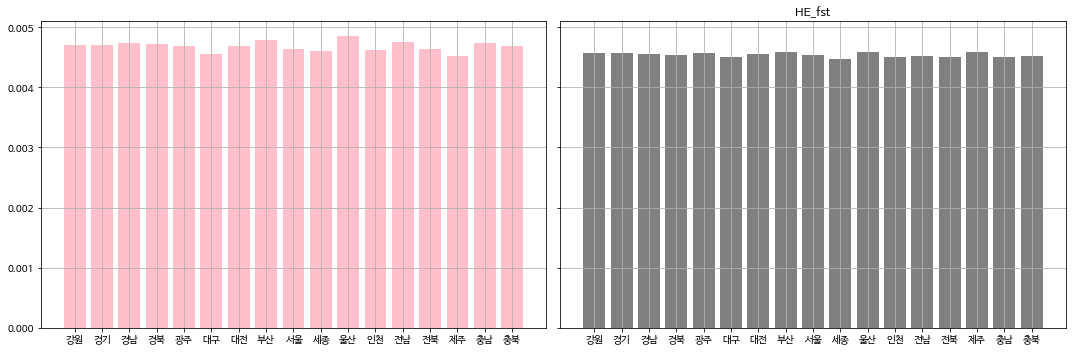

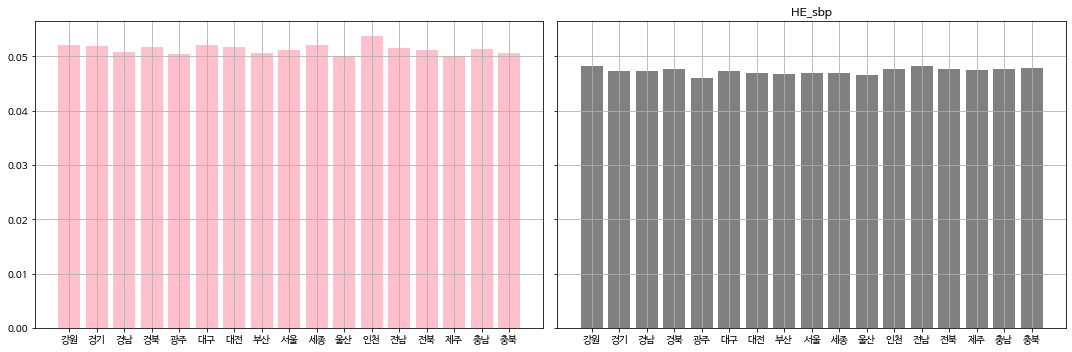

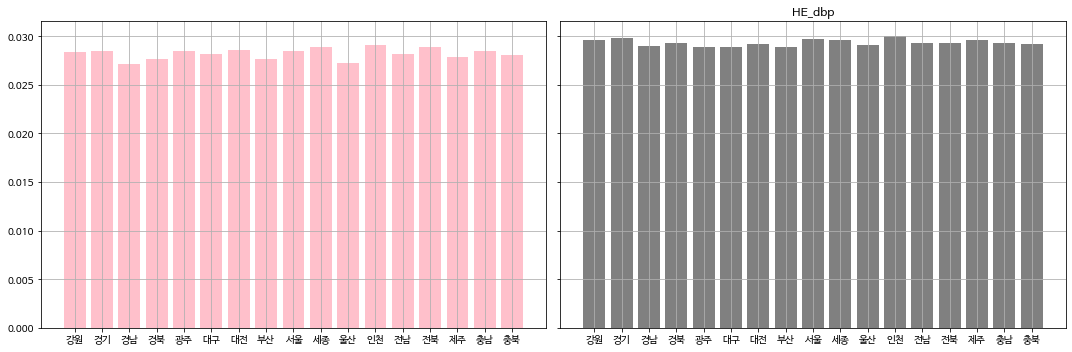

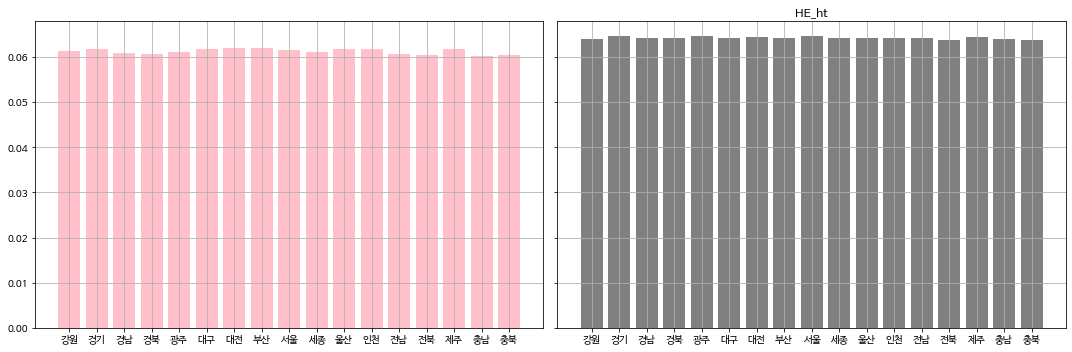

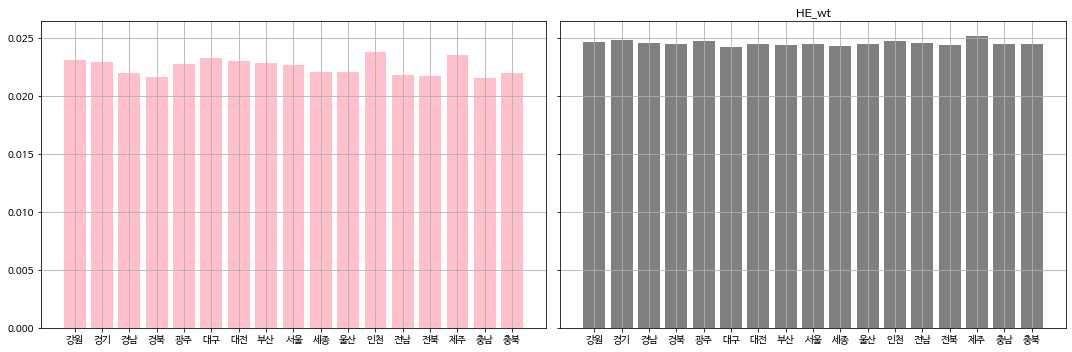

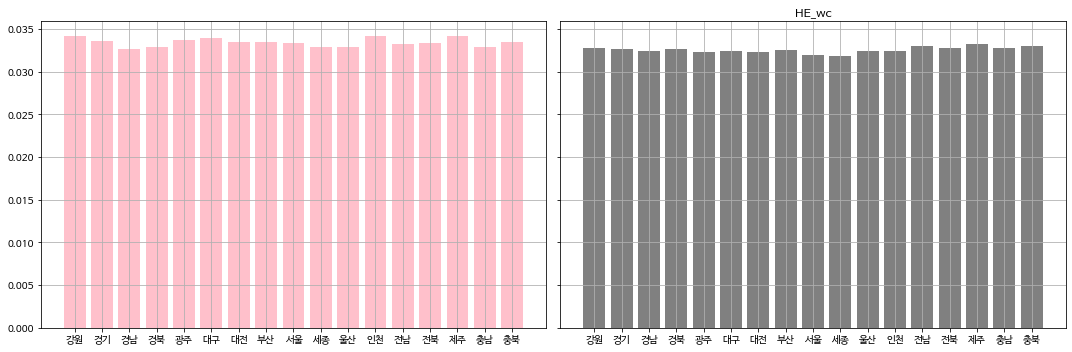

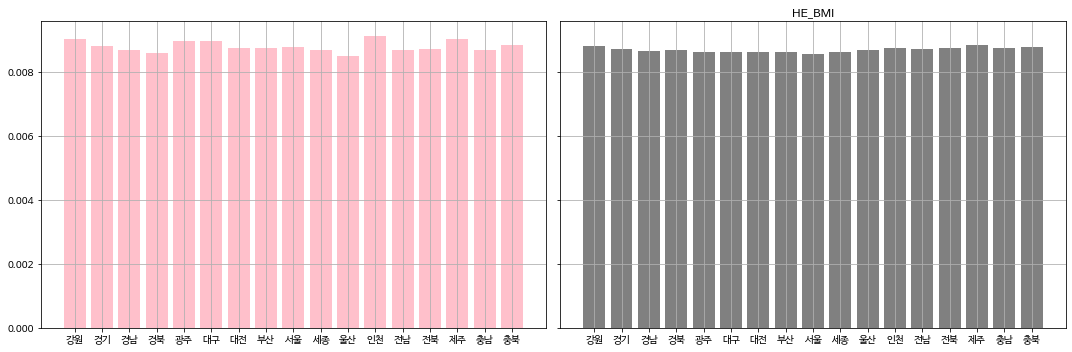

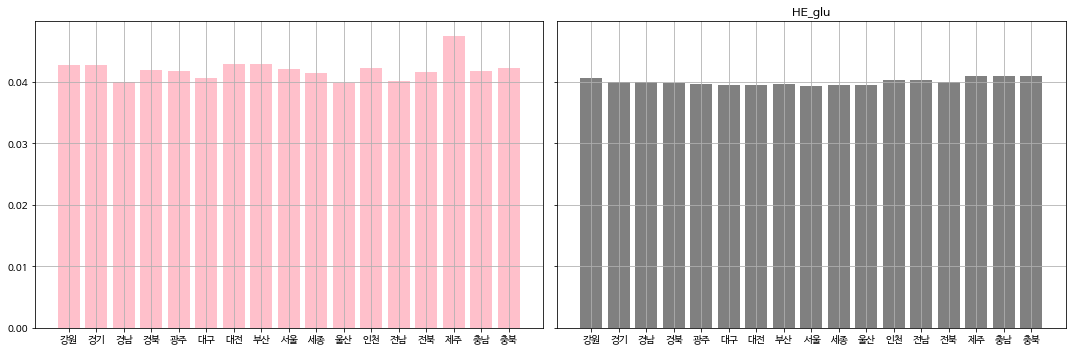

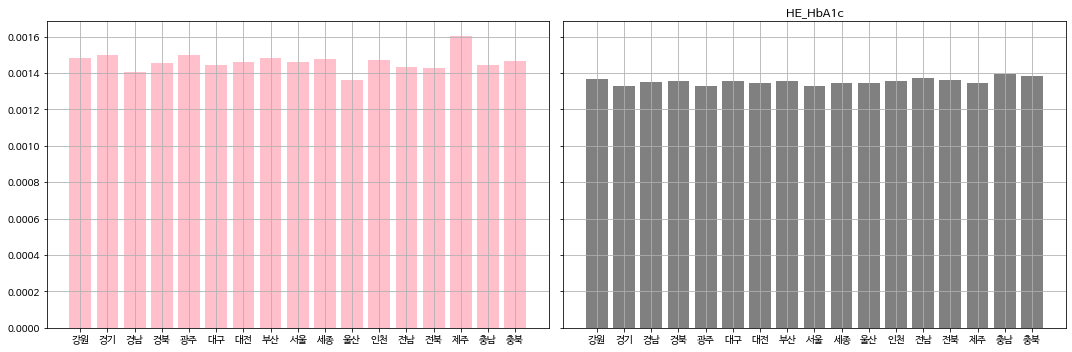

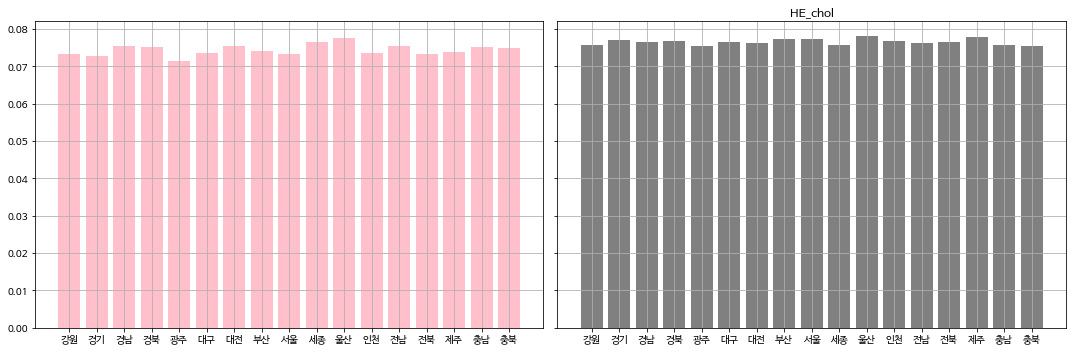

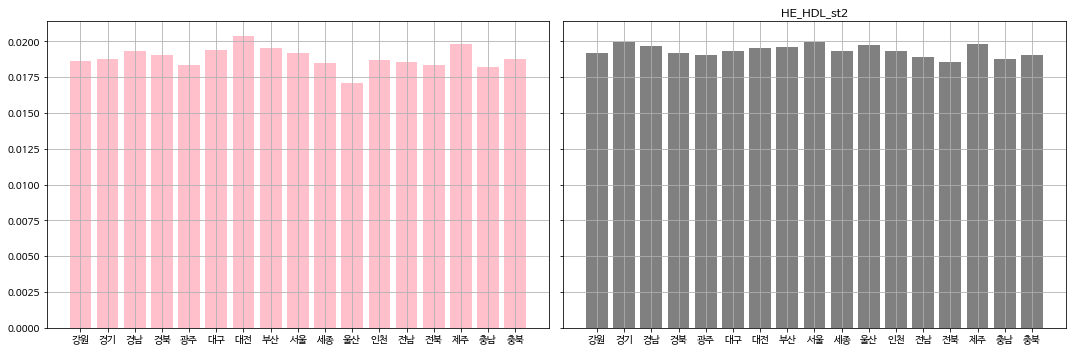

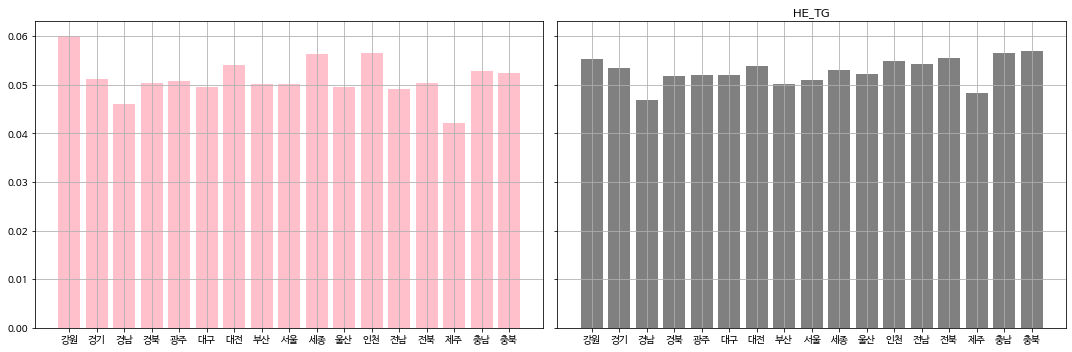

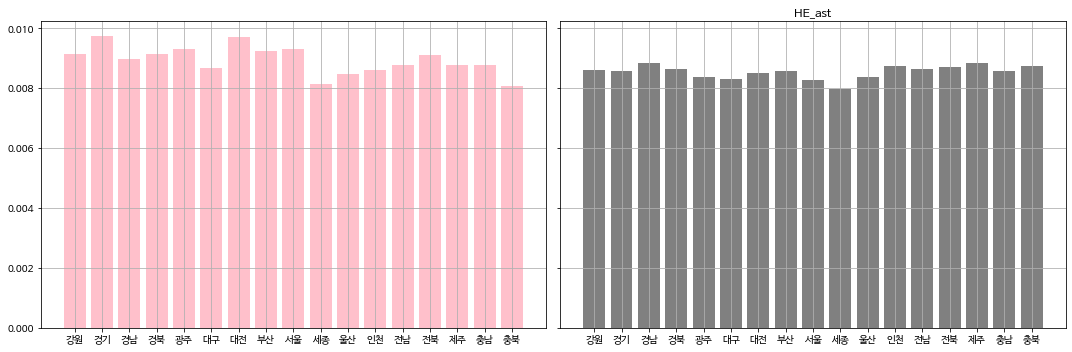

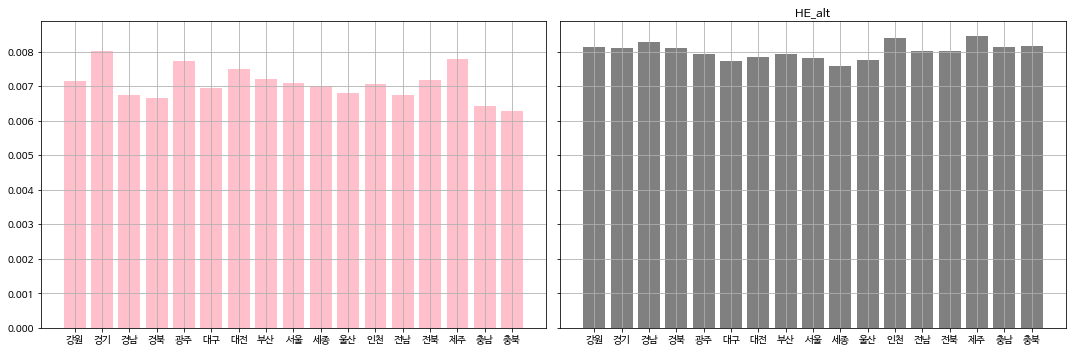

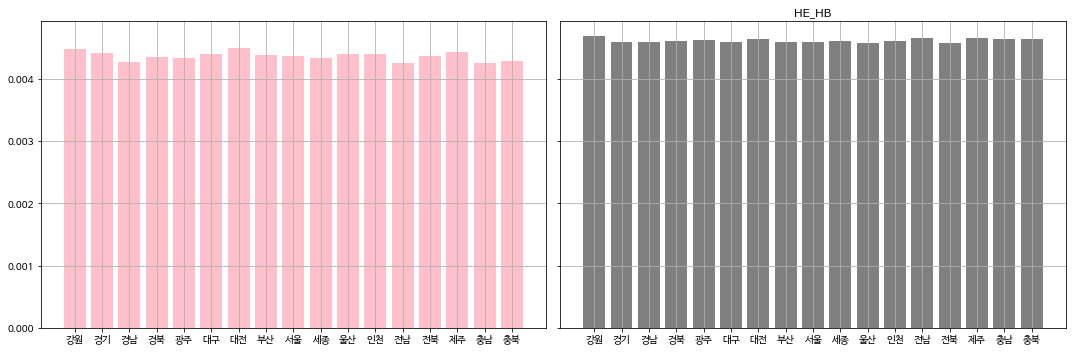

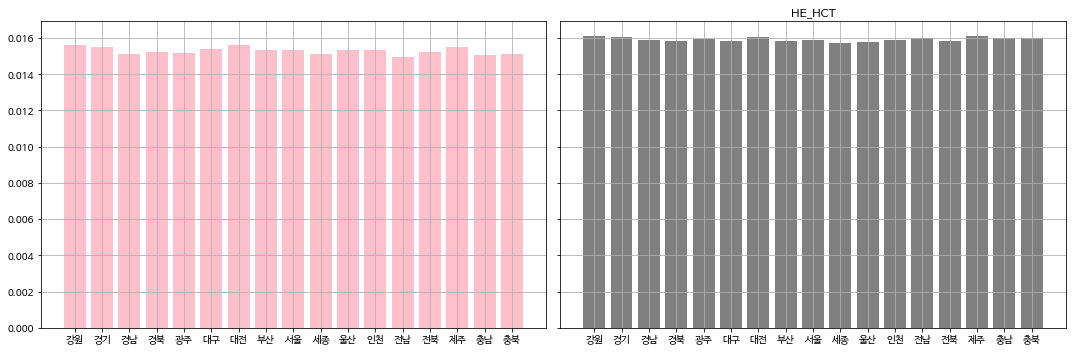

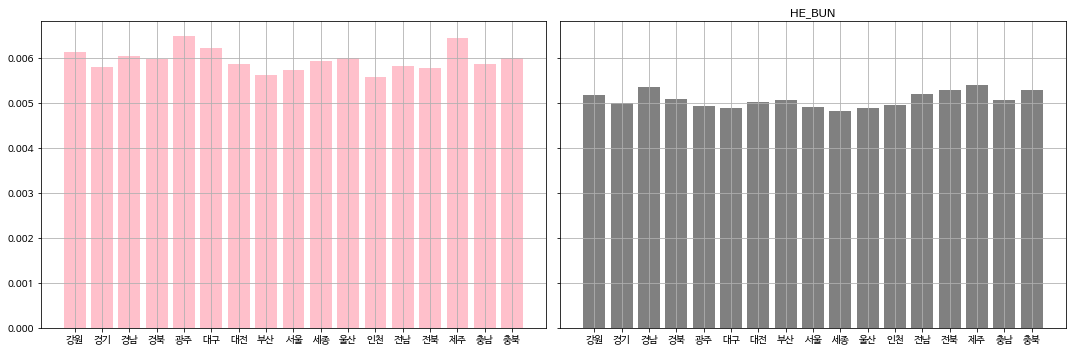

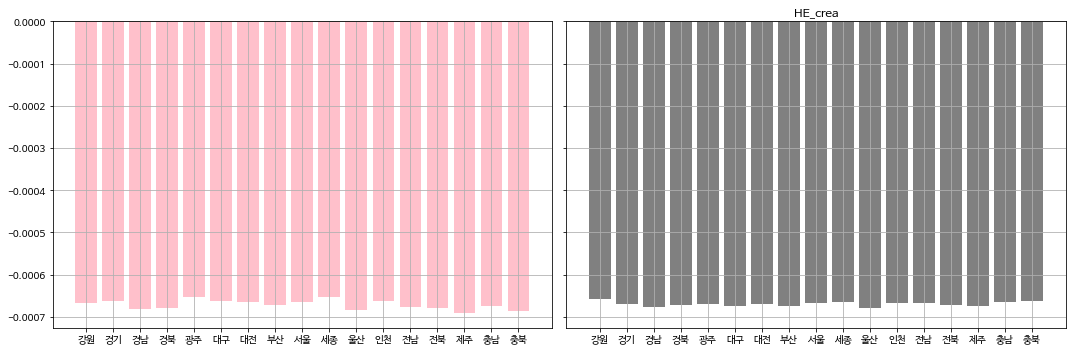

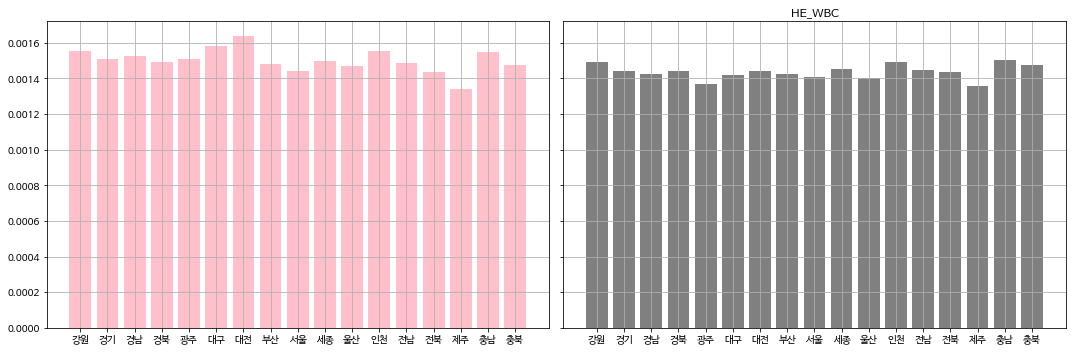

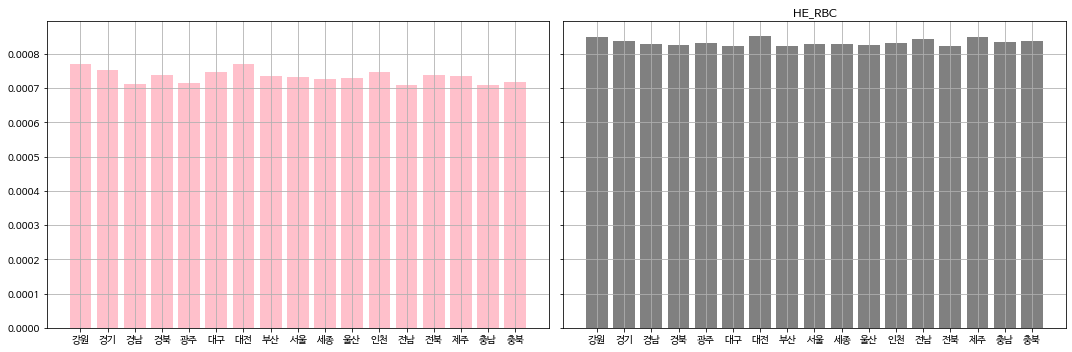

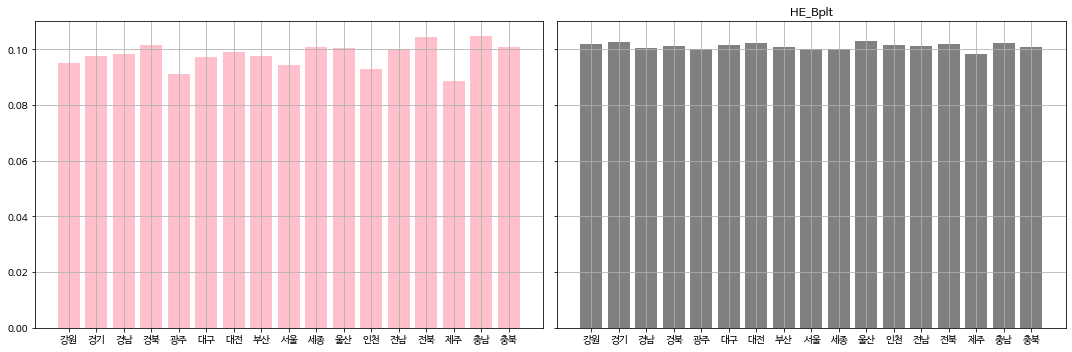

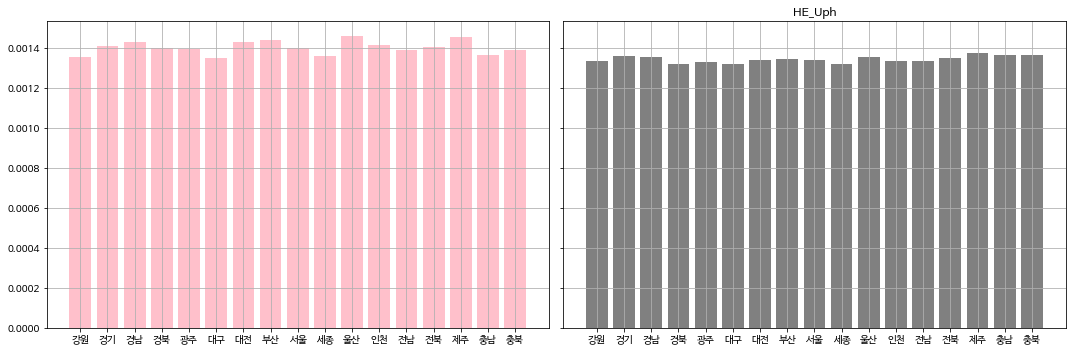

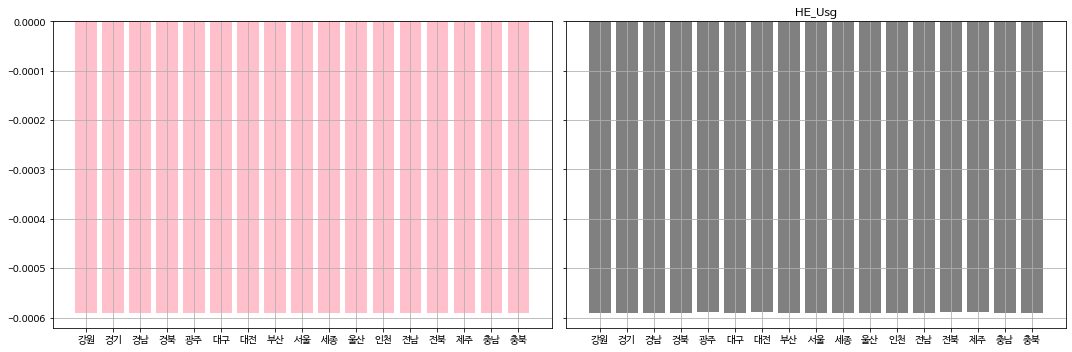

In [195]:
for i in range(len(mean_column)):
  feature = mean_column[i]
  feature1 = region_old_g.groupby('region')[feature].mean()/len(region_old_g['region']) - 0.001
  feature2 = region_not_old_g.groupby('region')[feature].mean()/len(region_old_g['region']) - 0.001
  bar_chart(feature1, feature2)

인천, 제주 BMI지수랑 체중이 높게 나옴

In [186]:
#소변검사 
소변검사 = ['HE_Upro','HE_Uglu','HE_Uket','HE_Ubil','HE_Ubld','HE_Uro']

#영양소 비교

In [171]:
nu_column=['HE_Ucrea',
 'N_INTK',
 'N_EN',
 'N_WATER',
 'N_PROT',
 'N_FAT',
 'N_CHO',
 'N_CA',
 'N_PHOS',
 'N_FE',
 'N_NA',
 'N_K',
 'N_CAROT',
 'N_RETIN',
 'N_B1',
 'N_B2',
 'N_NIAC',
 'N_VITC']

In [182]:
def bar_chart(feature1, feature2):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
    axes[0].bar(feature1.index, feature1, color='pink')
    axes[1].bar(feature2.index, feature2, color='grey')
    plt.title(feature)
    plt.tight_layout()

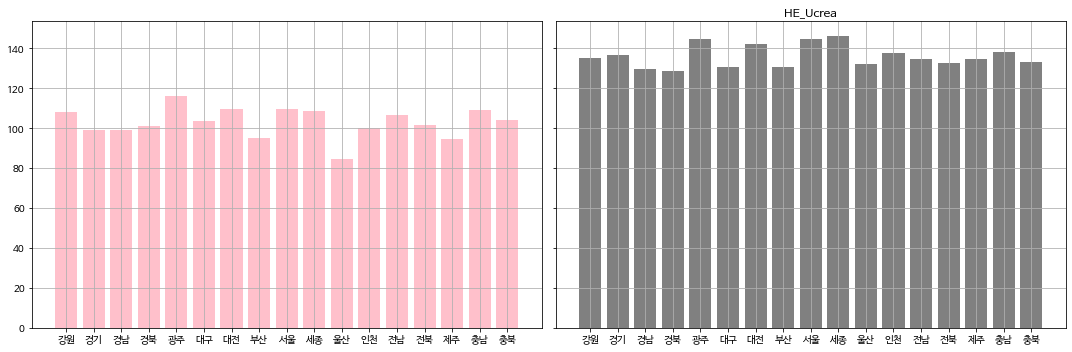

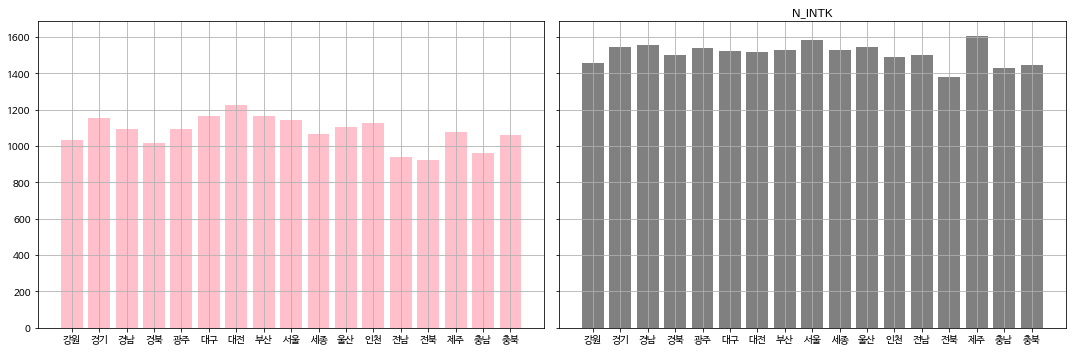

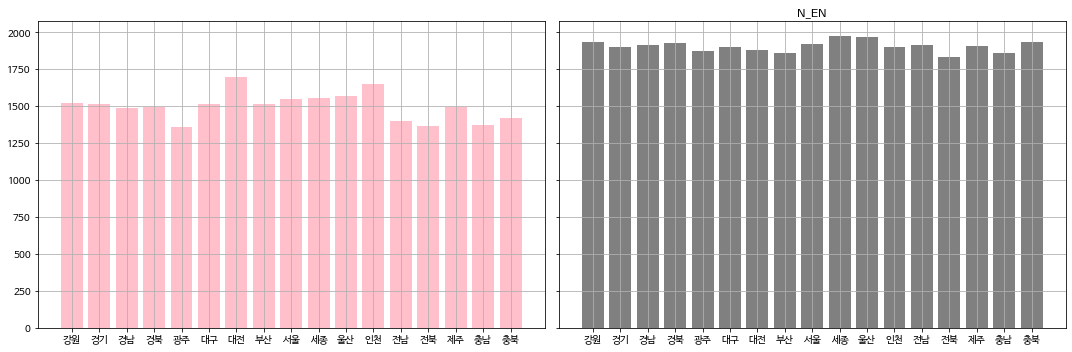

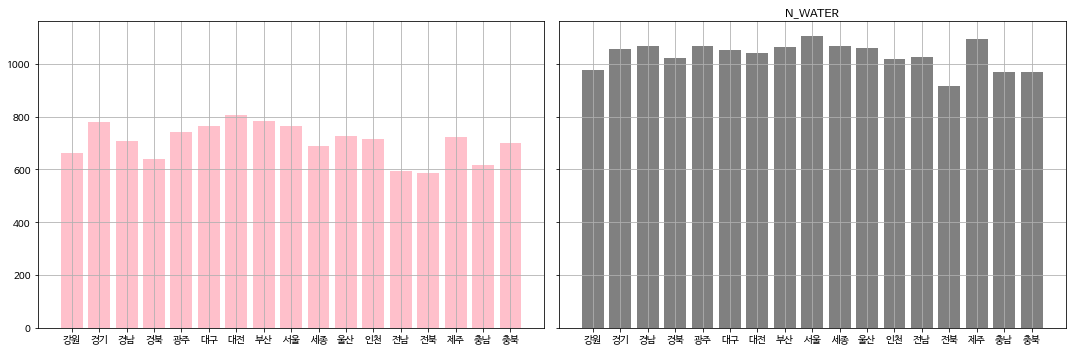

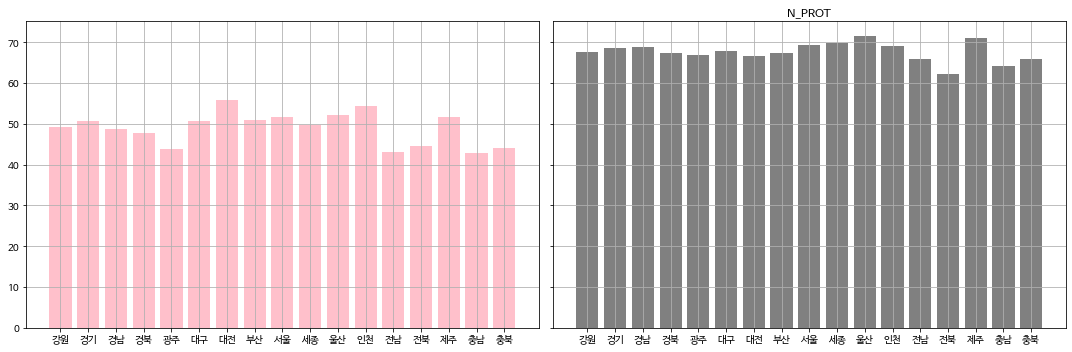

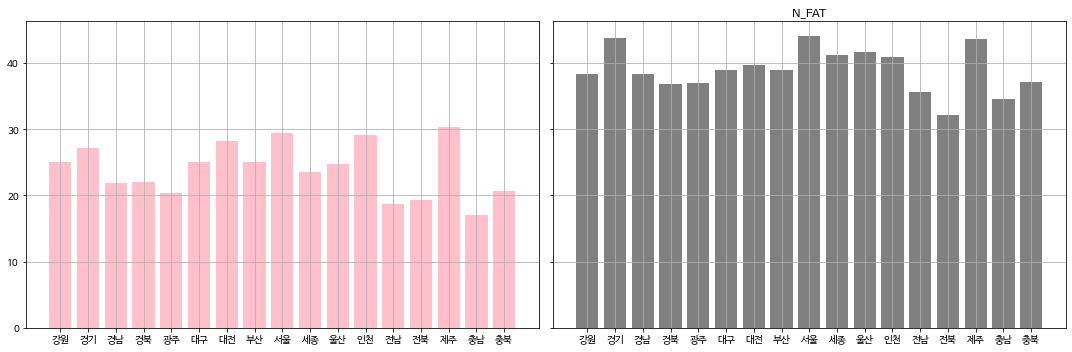

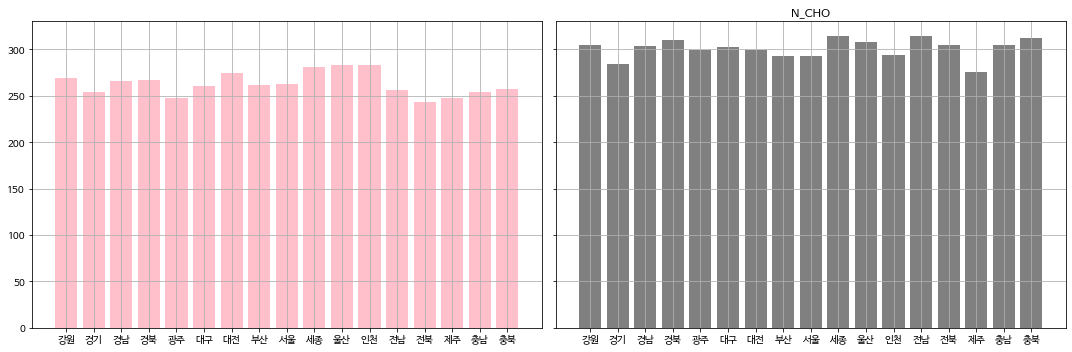

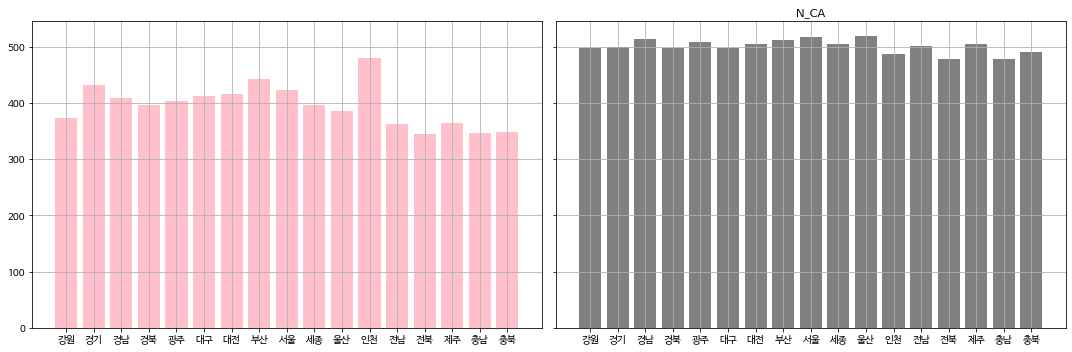

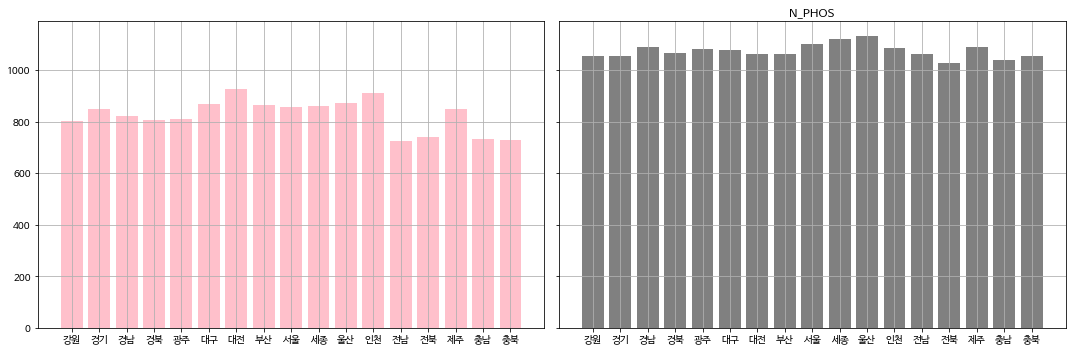

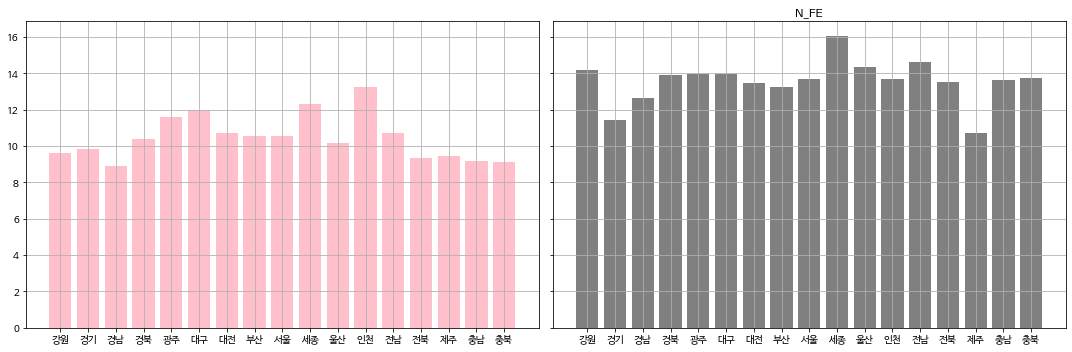

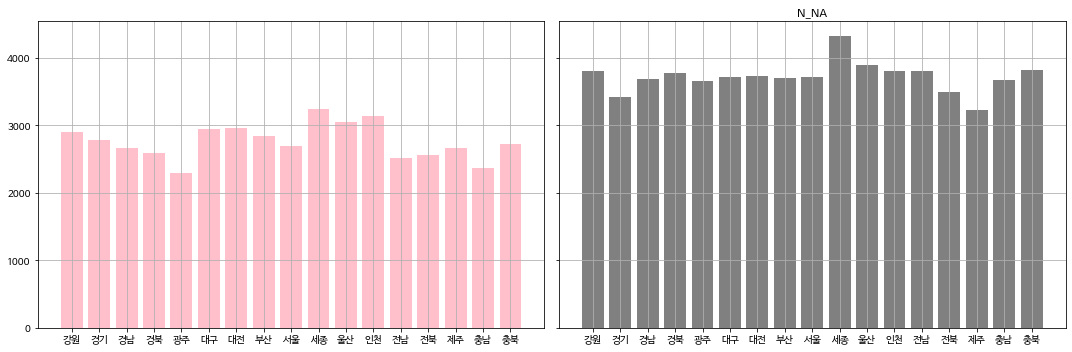

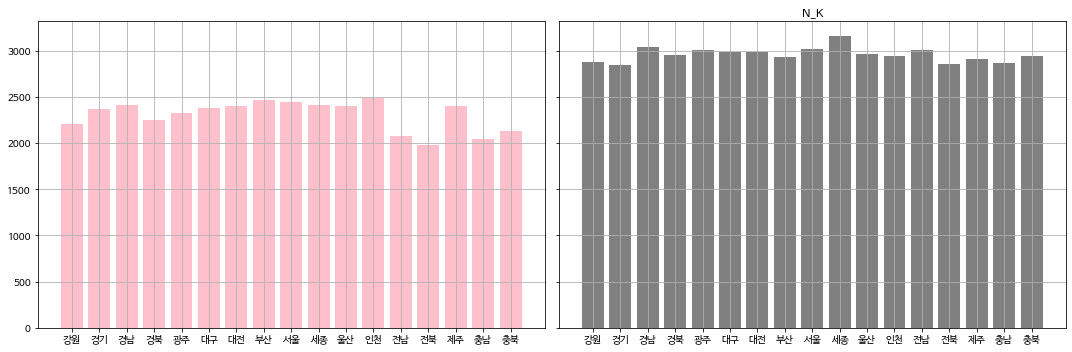

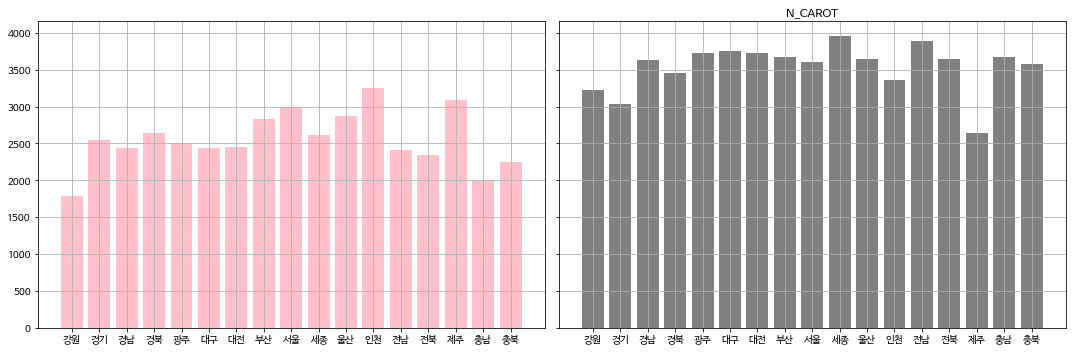

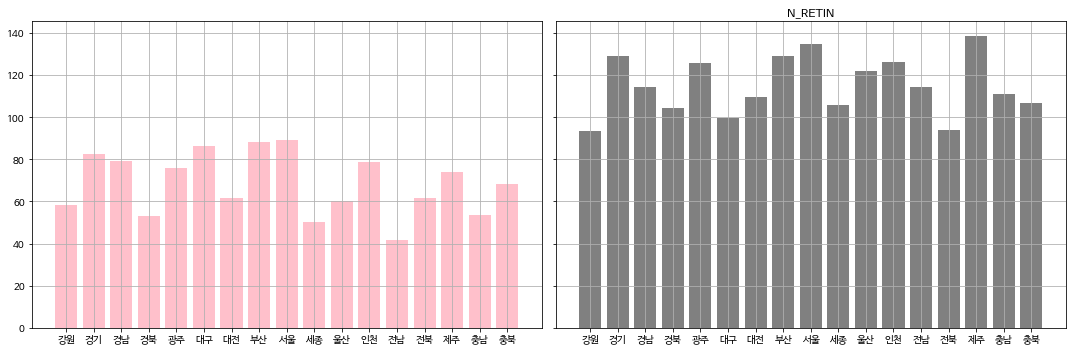

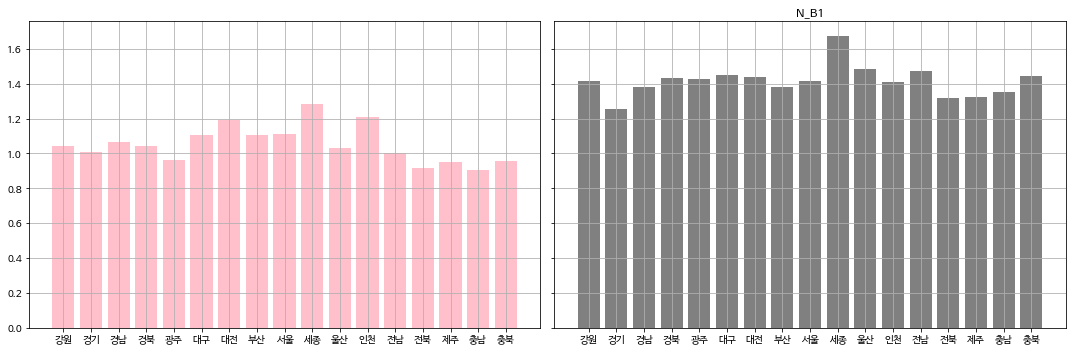

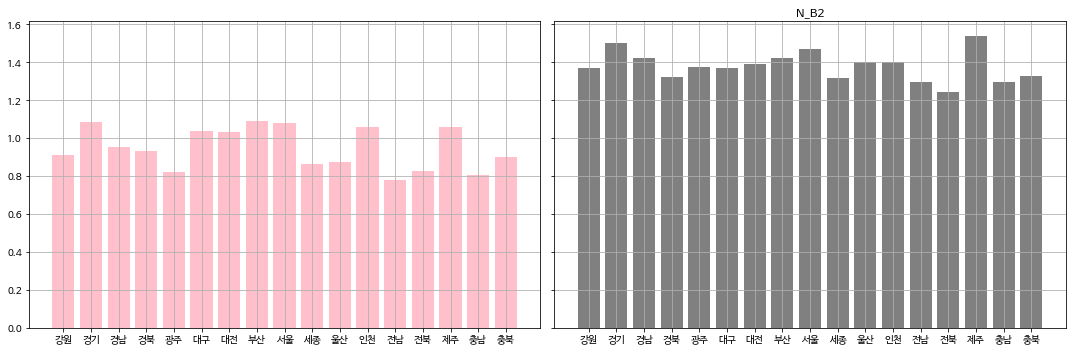

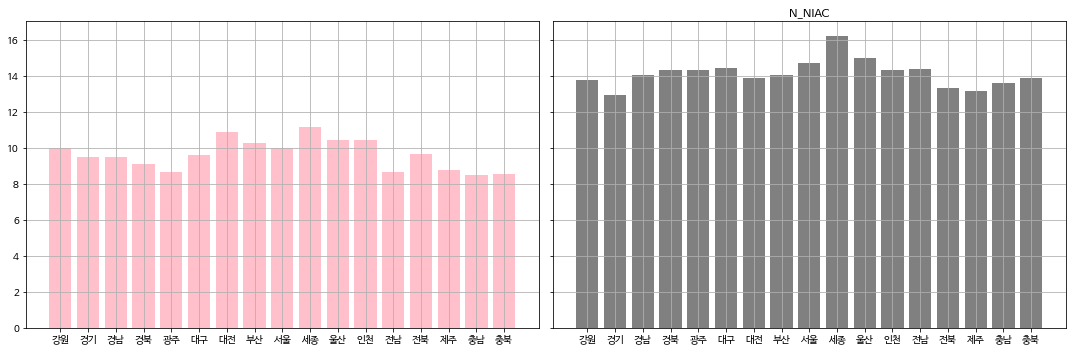

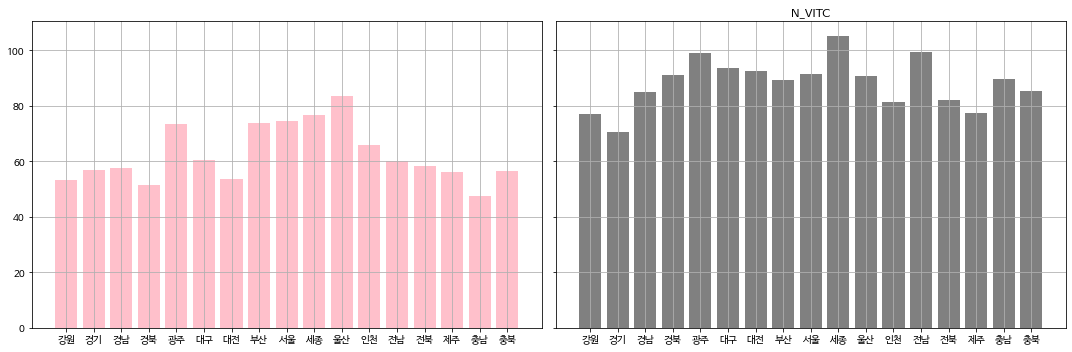

In [183]:
for i in range(len(nu_column)):
  feature = nu_column[i]
  feature1 = region_old_g.groupby('region')[feature].mean()
  feature2 = region_not_old_g.groupby('region')[feature].mean()
  bar_chart(feature1, feature2)

In [ ]:
# for i in range(len(columns)):
#   feature = columns[i]
#   feature1 = region_old_g[feature].value_counts()/len(region_old_g['region'])
#   feature2 = region_not_old_g[feature].value_counts()/len(region_not_old_g['region'])
# bar_chart(feature1, feature2)

In [80]:
fat_r = region_old_g[region_old_g['비만']==1].groupby('region')['비만'].size()/len(region_old_g['region'])
hypt_r = region_old_g[region_old_g['고혈압']==1].groupby('region')['고혈압'].size()/len(region_old_g['region'])
dia_r = region_old_g[region_old_g['당뇨병']==1].groupby('region')['당뇨병'].size()/len(region_old_g['region'])
hycl_r = region_old_g[region_old_g['고콜레스테롤혈증']==1].groupby('region')['고콜레스테롤혈증'].size()/len(region_old_g['region'])
hyft_r = region_old_g[region_old_g['고중성지방혈증']==1].groupby('region')['고중성지방혈증'].size()/len(region_old_g['region'])
Bt_r = region_old_g[region_old_g['B형간염']==1].groupby('region')['B형간염'].size()/len(region_old_g['region'])
anem_r = region_old_g[region_old_g['빈혈']==1].groupby('region')['빈혈'].size()/len(region_old_g['region'])
stroke_r = region_old_g[region_old_g['뇌졸중']==1].groupby('region')['뇌졸중'].size()/len(region_old_g['region'])
myin_r = region_old_g[region_old_g['협심증또는심근경색증']==1].groupby('region')['협심증또는심근경색증'].size()/len(region_old_g['region'])
asth_r = region_old_g[region_old_g['천식']==1].groupby('region')['천식'].size()/len(region_old_g['region'])
ato_r = region_old_g[region_old_g['아토피피부염']==1].groupby('region')['아토피피부염'].size()/len(region_old_g['region'])
oste_r = region_old_g[region_old_g['골관절염']==1].groupby('region')['골관절염'].size()/len(region_old_g['region'])
depression_r = region_old_g[region_old_g['우울증']==1].groupby('region')['우울증'].size()/len(region_old_g['region'])

In [81]:
fat_r_not = region_not_old_g[region_not_old_g['비만']==1].groupby('region')['비만'].size()/len(region_not_old_g['region'])
hypt_r_not = region_not_old_g[region_not_old_g['고혈압']==1].groupby('region')['고혈압'].size()/len(region_not_old_g['region'])
dia_r_not = region_not_old_g[region_not_old_g['당뇨병']==1].groupby('region')['당뇨병'].size()/len(region_not_old_g['region'])
hycl_r_not = region_not_old_g[region_not_old_g['고콜레스테롤혈증']==1].groupby('region')['고콜레스테롤혈증'].size()/len(region_not_old_g['region'])
hyft_r_not = region_not_old_g[region_not_old_g['고중성지방혈증']==1].groupby('region')['고중성지방혈증'].size()/len(region_not_old_g['region'])
Bt_r_not = region_not_old_g[region_not_old_g['B형간염']==1].groupby('region')['B형간염'].size()/len(region_not_old_g['region'])
anem_r_not = region_not_old_g[region_not_old_g['빈혈']==1].groupby('region')['빈혈'].size()/len(region_not_old_g['region'])
stroke_r_not = region_not_old_g[region_not_old_g['뇌졸중']==1].groupby('region')['뇌졸중'].size()/len(region_not_old_g['region'])
myin_r_not = region_not_old_g[region_not_old_g['협심증또는심근경색증']==1].groupby('region')['협심증또는심근경색증'].size()/len(region_not_old_g['region'])
asth_r_not = region_not_old_g[region_not_old_g['천식']==1].groupby('region')['천식'].size()/len(region_not_old_g['region'])
ato_r_not = region_not_old_g[region_not_old_g['아토피피부염']==1].groupby('region')['아토피피부염'].size()/len(region_not_old_g['region'])
oste_r_not = region_not_old_g[region_not_old_g['골관절염']==1].groupby('region')['골관절염'].size()/len(region_not_old_g['region'])
depression_r_not = region_not_old_g[region_not_old_g['우울증']==1].groupby('region')['우울증'].size()/len(region_not_old_g['region'])

In [98]:
def bar_plot(feature1, feature2):
  fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
  axes[0].bar(feature1.index, feature1, color='pink')
  axes[1].bar(feature2.index, feature2, color='grey')
  plt.tight_layout()


Text(0.5, 1.0, '지역별 비만')

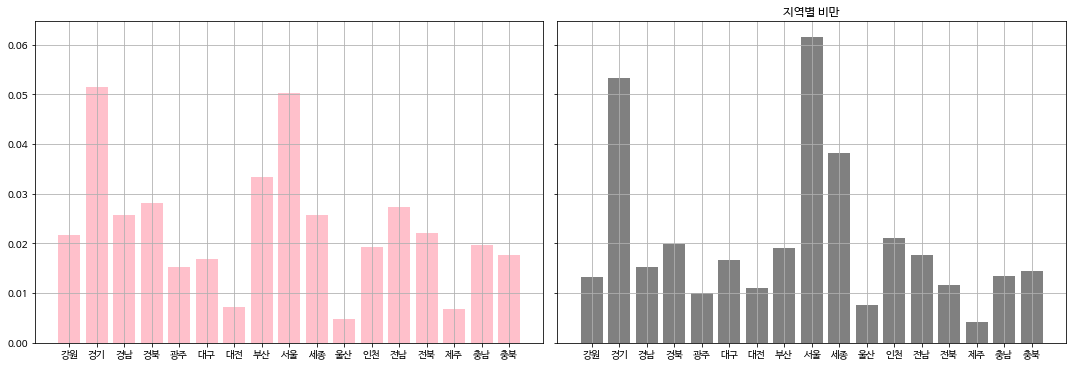

In [99]:
bar_plot(fat_r, fat_r_not)
plt.title("지역별 비만")

Text(0.5, 1.0, '지역별 고혈압')

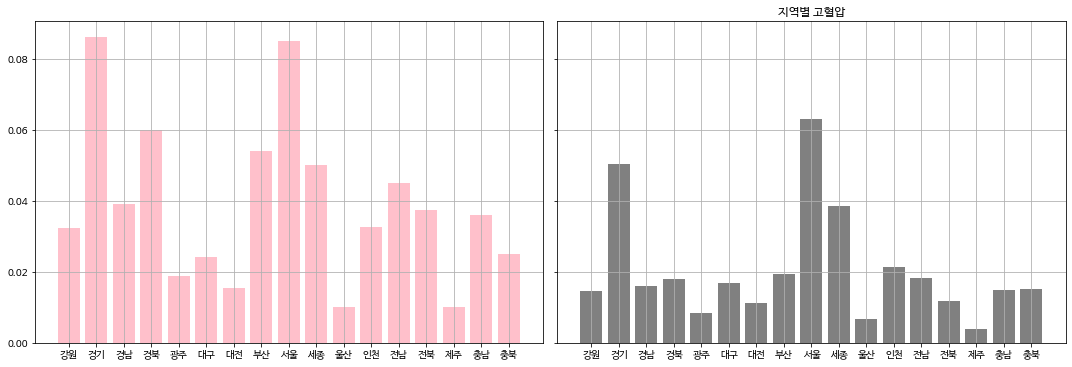

In [100]:
bar_plot(hypt_r, hypt_r_not)
plt.title("지역별 고혈압")

Text(0.5, 1.0, '지역별 당뇨병')

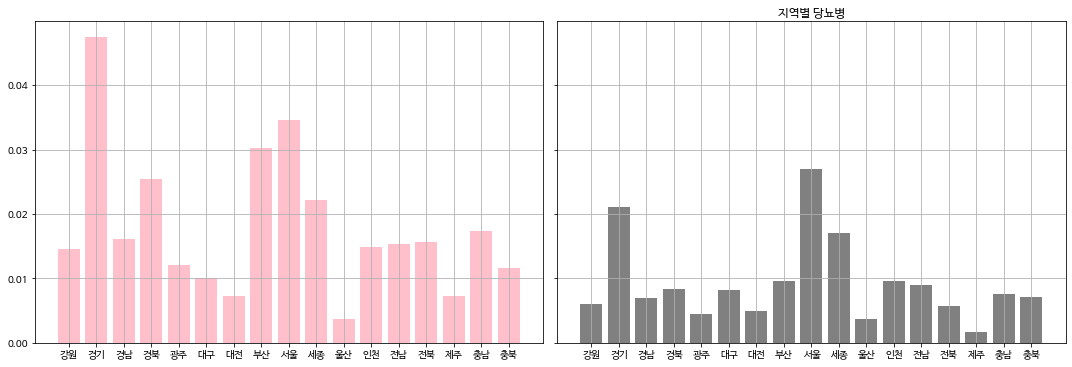

In [101]:
bar_plot(dia_r,dia_r_not)
plt.title('지역별 당뇨병')

Text(0.5, 1.0, '지역별 고콜레스테롤혈증')

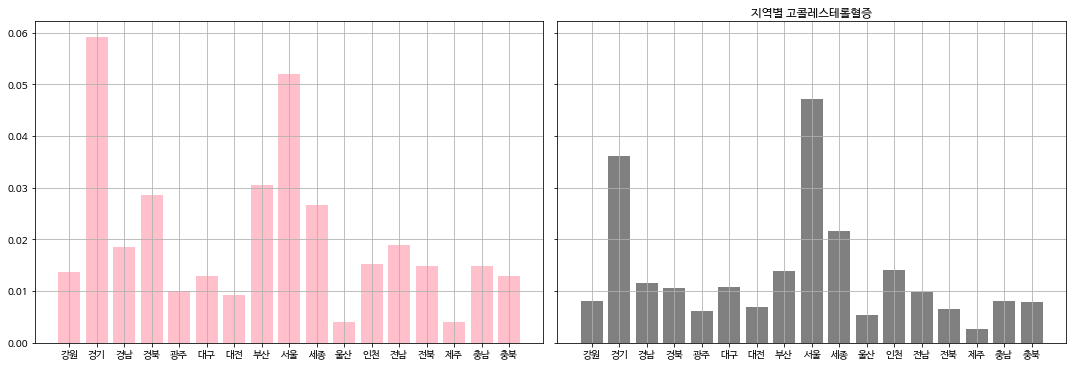

In [102]:
bar_plot(hycl_r, hycl_r_not)
plt.title('지역별 고콜레스테롤혈증')

Text(0.5, 1.0, '지역별 고중성지방혈증')

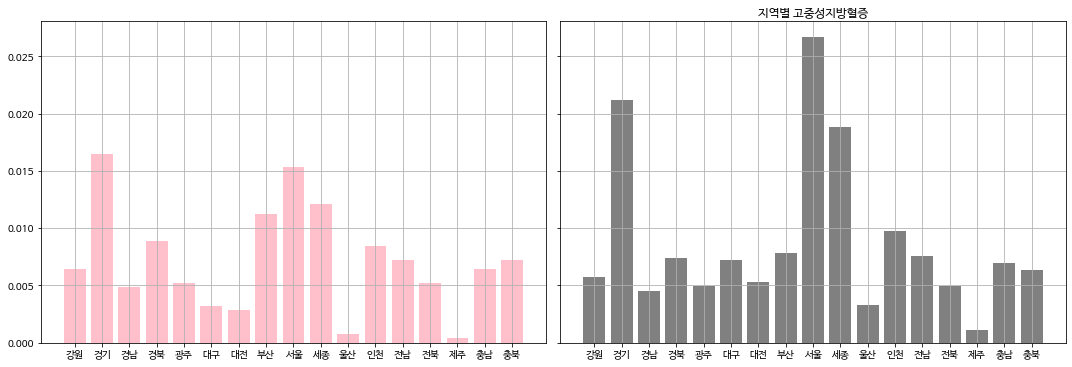

In [103]:
bar_plot(hyft_r, hyft_r_not)
plt.title('지역별 고중성지방혈증')

Text(0.5, 1.0, '지역별 B형간염')

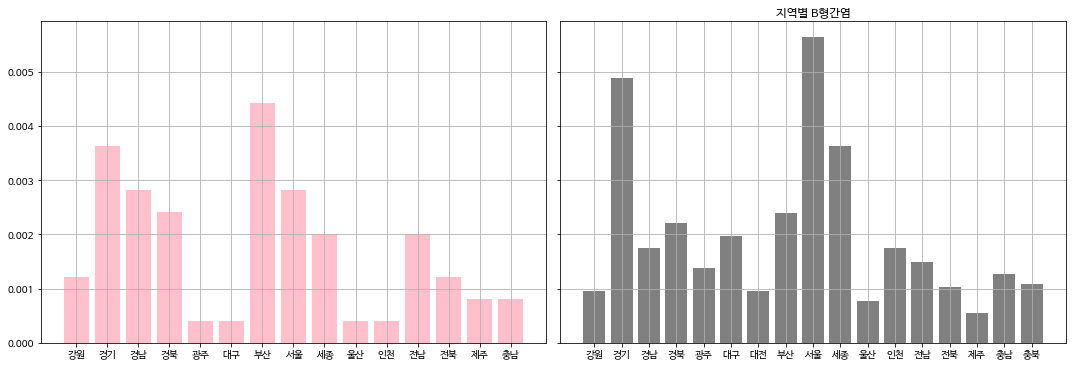

In [104]:
bar_plot(Bt_r, Bt_r_not)
plt.title('지역별 B형간염')

Text(0.5, 1.0, '지역별 빈혈')

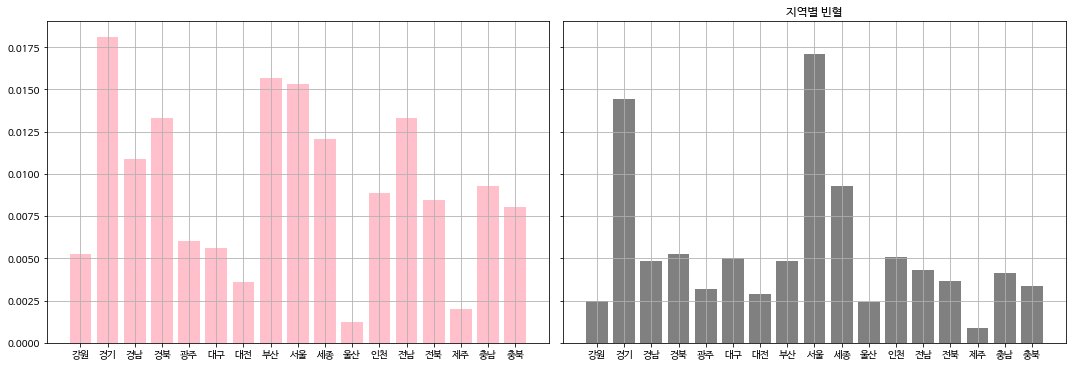

In [105]:
bar_plot(anem_r, anem_r_not) 
plt.title('지역별 빈혈')

Text(0.5, 1.0, '지역별 뇌졸중')

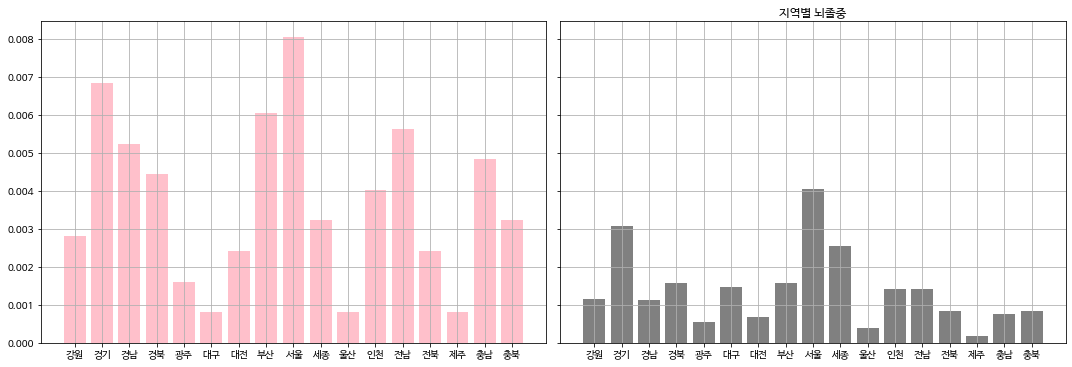

In [107]:
bar_plot(stroke_r, stroke_r_not)
plt.title('지역별 뇌졸중')

Text(0.5, 1.0, '협심증또는심근경색증')

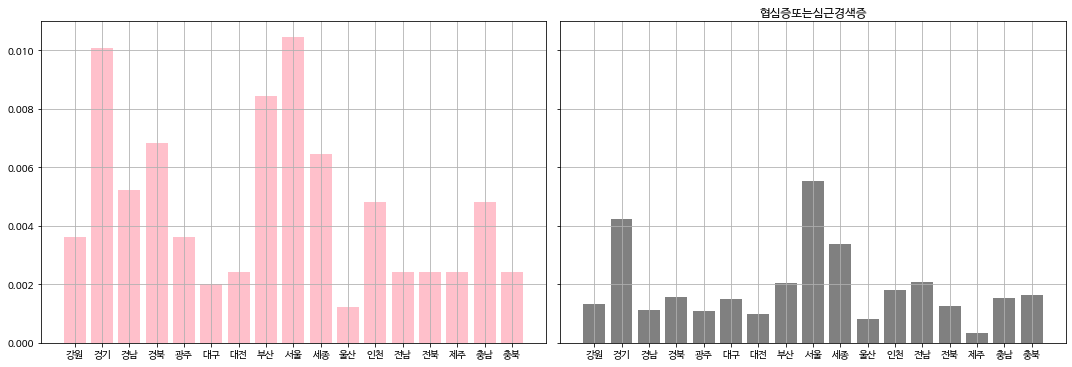

In [108]:
bar_plot(myin_r, myin_r_not)
plt.title('협심증또는심근경색증')

Text(0.5, 1.0, '지역별 천식')

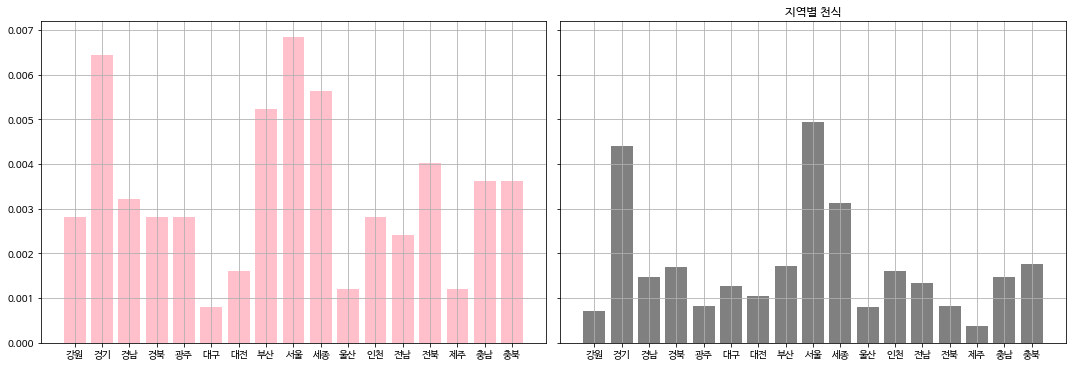

In [109]:
bar_plot(asth_r, asth_r_not)
plt.title('지역별 천식')

Text(0.5, 1.0, '아토피피부염')

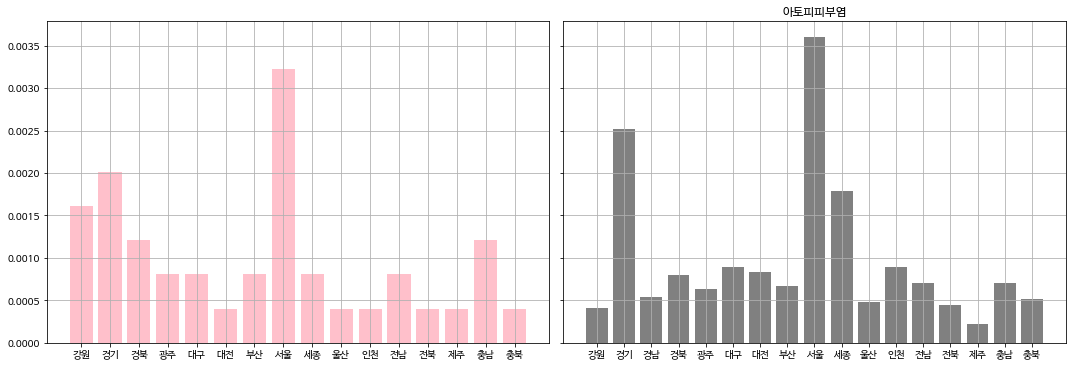

In [110]:
bar_plot(ato_r, ato_r_not)
plt.title('아토피피부염')

Text(0.5, 1.0, '지역별 골관절염')

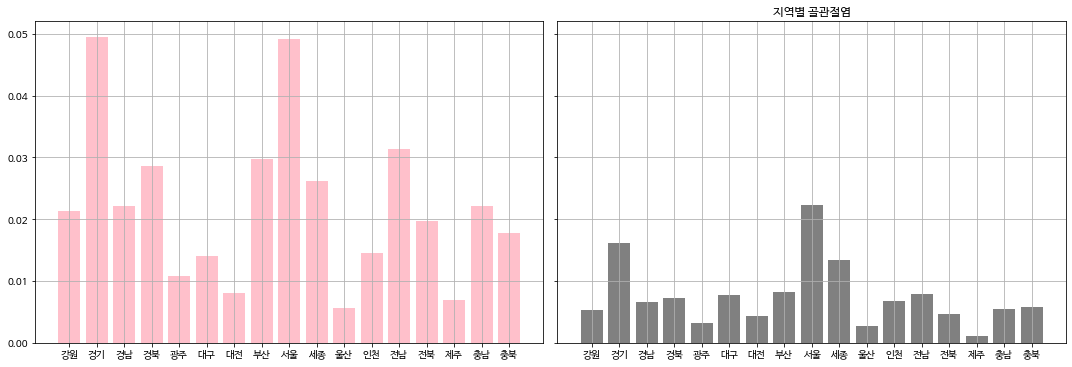

In [111]:
bar_plot(oste_r, oste_r_not) 
plt.title('지역별 골관절염')

Text(0.5, 1.0, '지역별 우울증')

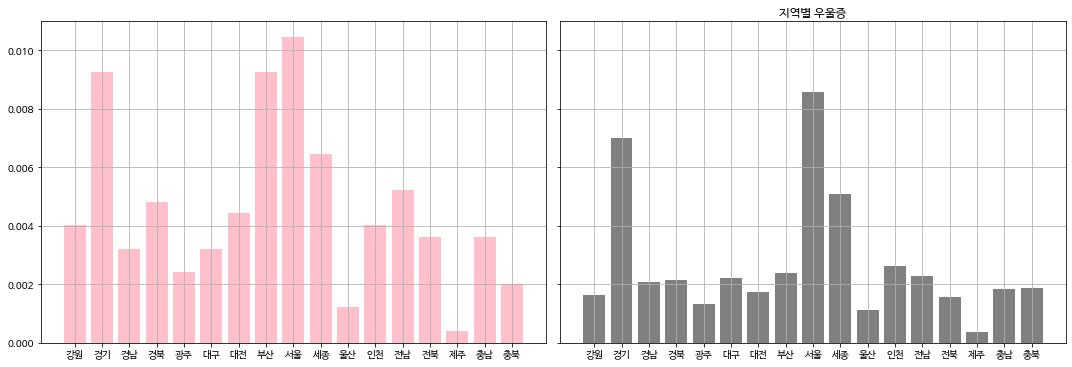

In [112]:
bar_plot(depression_r,depression_r_not)
plt.title('지역별 우울증')

#지역별로 dataframe 설정하기

읍, 동으로 나누기

In [59]:
region_old_g.set_index('region', inplace=True)

In [60]:
region_not_old_g.set_index('region', inplace=True)

In [32]:
region_old_g.head()

,Unnamed: 0,ID,ID_fam,year,town_t,sex,age,incm,ho_incm,incm5,...,고콜레스테롤혈증,고중성지방혈증,B형간염,빈혈,뇌졸중,협심증또는심근경색증,천식,아토피피부염,골관절염,우울증
region,,,,,,,,,,,,,,,,,,,,,
서울,33,b'A326339801',b'A3263398',2010.0,1.0,2.0,74.0,3.0,1.0,3.0,...,0.0,0.0,0.0,0.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0
서울,56,b'A338719801',b'A3387198',2010.0,1.0,2.0,75.0,2.0,1.0,3.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
서울,427,b'A350972901',b'A3509729',2011.0,1.0,2.0,71.0,2.0,1.0,2.0,...,1.0,1.0,0.0,1.0,-1.0,-1.0,-1.0,0.0,1.0,-1.0
서울,464,b'A352419801',b'A3524198',2011.0,1.0,2.0,72.0,4.0,2.0,4.0,...,1.0,1.0,0.0,0.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0
서울,488,b'A353559801',b'A3535598',2011.0,1.0,2.0,72.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0


In [39]:
print(region)

incm
1.0    907
2.0    809
3.0    542
4.0    225
dtype: int64


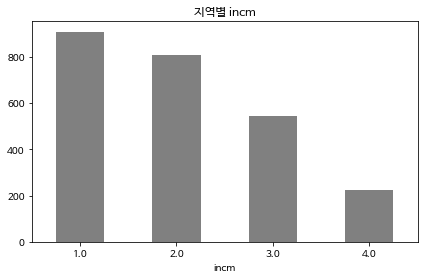

In [37]:
region = region_old_g.groupby('incm').size()

x = 
years = ['2018', '2019', '2020']
values = [100, 400, 900]

plt.bar(x, values)
plt.xticks(x, region)

plt.show()

region.plot(x, region, color='grey', kind='bar', rot=0)
plt.title("지역별 incm")
plt.tight_layout()

#독거노인 변수 상관관계

In [113]:
 columns = [ 'year',
 'region',
 'town_t',
 'sex',
 'age',
 'incm',
 'ho_incm',
 'incm5',
 'ho_incm5',
 'edu',
 'occp',
 'cfam',
 'genertn',
 'allownc',
 'marri_1',
 'marri_2',
 'fam_rela',
 'tins',
 'D_1_1',
 'educ',
 'EC1_1',
 'EC_wht_23',
 'EC_wht_5',
 'EC_pedu_1',
 'EC_pedu_2',
 'BD1_11',
 'BD2_1',
 'BD2_31',
 'dr_month',
 'BP6_10',
 'BP7',
 'mh_stress',
 'BS3_1',
 'BE3_31',
 'BE5_1',
 'LW_mt',
 'LW_mt_a1',
 'LW_br',
 'HE_fst',
 'HE_HPdr',
 'HE_DMdr',
 'HE_mens',
 'HE_prg',
 'HE_HPfh1',
'HE_HPfh2',
 'HE_HPfh3',
 'HE_HLfh1',
 'HE_HLfh2',
 'HE_HLfh3',
 'HE_IHDfh1',
 'HE_IHDfh2',
 'HE_IHDfh3',
 'HE_STRfh1',
 'HE_STRfh2',
 'HE_STRfh3',
 'HE_DMfh1',
 'HE_DMfh2',
 'HE_DMfh3',
 'HE_rPLS',
 'HE_sbp',
 'HE_dbp',
 'HE_ht',
 'HE_wt',
 'HE_wc',
 'HE_BMI',
 'HE_glu',
 'HE_HbA1c',
 'HE_chol',
 'HE_HDL_st2',
 'HE_TG',
 'HE_ast',
 'HE_alt',
 'HE_hepaB',
 'HE_HB',
 'HE_HCT',
 'HE_BUN',
 'HE_crea',
 'HE_WBC',
 'HE_RBC',
 'HE_Bplt',
 'HE_Uph',
 'HE_Unitr',
'HE_Usg',
 'HE_Upro',
 'HE_Uglu',
 'HE_Uket',
 'HE_Ubil',
 'HE_Ubld',
 'HE_Uro',
 'HE_Ucrea',
 'N_INTK',
 'N_EN',
 'N_WATER',
 'N_PROT',
 'N_FAT',
 'N_CHO',
 'N_CA',
 'N_PHOS',
 'N_FE',
 'N_NA',
 'N_K',
 'N_CAROT',
 'N_RETIN',
 'N_B1',
 'N_B2',
 'N_NIAC',
 'N_VITC',
 '비만',
 '고혈압',
 '당뇨병',
 '고콜레스테롤혈증',
 '고중성지방혈증',
 'B형간염',
 '빈혈',
 '뇌졸중',
 '협심증또는심근경색증',
 '천식',
 '아토피피부염',
 '골관절염',
 '우울증']


In [117]:
df_region = region_old_g[columns]
df_corr = df_region.corr()

In [197]:
df_corr['우울증'].sort_values()

BP6_10      -0.224848
EC_pedu_1   -0.151758
N_NA        -0.149328
EC_pedu_2   -0.148068
BP7         -0.142410
               ...   
아토피피부염       0.647934
우울증          1.000000
cfam              NaN
genertn           NaN
fam_rela          NaN
Name: 우울증, Length: 119, dtype: float64

In [121]:
e_columns = ['sex','age','incm','ho_incm','incm5','ho_incm5','edu','occp','cfam','genertn','allownc','marri_1','marri_2','fam_rela','tins','D_1_1','educ',
             'EC1_1','EC_wht_23','EC_wht_5','EC_pedu_1','EC_pedu_2','BD1_11',
 'BD2_1',
 'BD2_31',
 'dr_month',
 'BP6_10',
 'BP7',
 'mh_stress',
 'BS3_1',
 'BE3_31']
#  'BE5_1','LW_mt',
#  'LW_mt_a1',
#  'LW_br',
#  'HE_fst',
#  'HE_HPdr',
#  'HE_DMdr',
#  'HE_mens',
#  'HE_prg',
#  'HE_HPfh1',
#  'HE_HPfh2',
#  'HE_HPfh3',
#  'HE_HLfh1',
#  'HE_HLfh2',
#  'HE_HLfh3',
#  'HE_IHDfh1',
#  'HE_IHDfh2',
#  'HE_IHDfh3',
#  'HE_STRfh1',
#  'HE_STRfh2',
#  'HE_STRfh3',
#  'HE_DMfh1',
#  'HE_DMfh2',
#  'HE_DMfh3',
#  'HE_rPLS',
#  'HE_sbp',
#  'HE_dbp',
#  'HE_ht',
#  'HE_wt',
#  'HE_wc',
#  'HE_BMI',
#  'HE_glu',
#  'HE_HbA1c',
#  'HE_chol',
#  'HE_HDL_st2',
#  'HE_TG',
#  'HE_ast',
#  'HE_alt',
#  'HE_hepaB',
#  'HE_HB',
#  'HE_HCT',
#   'HE_BUN',
#  'HE_crea',
#  'HE_WBC',
#  'HE_RBC',
#  'HE_Bplt',
#  'HE_Uph',
#  'HE_Unitr',
#  'HE_Usg',
#  'HE_Upro',
#  'HE_Uglu',
#  'HE_Uket',
#  'HE_Ubil',
#  'HE_Ubld',
#  'HE_Uro',
#  'HE_Ucrea',
#  'N_INTK',
#  'N_EN',
#  'N_WATER',
#  'N_PROT',
#  'N_FAT',
#  'N_CHO',
#  'N_CA',
#  'N_PHOS',
#  'N_FE',
#  'N_NA',
#  'N_K',
#  'N_CAROT',
#  'N_RETIN',
#  'N_B1',
#  'N_B2',
#  'N_NIAC',
#  'N_VITC']

In [122]:
df_region_e = region_old_g[e_columns] 
df_corr_e = df_region_e.corr()

### 독거노인 상관관계

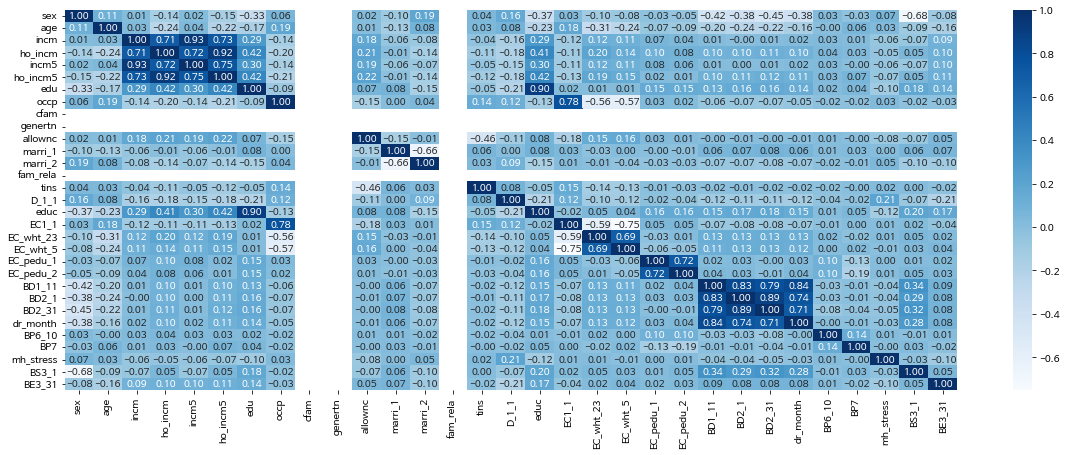

In [127]:
plt.figure(figsize=(20,7))
sns.heatmap(df_corr_e, annot=True, fmt=".2f", cmap="Blues")

### 독거노인이 아닌 노인들 상관관계

In [124]:
df_region_not = region_not_old_g[columns] #질병 제외
df_corr_not = df_region_not.corr()
df_region_not_e = region_not_old_g[e_columns] #질병 제외
df_corr_not_e = df_region_not_e.corr()

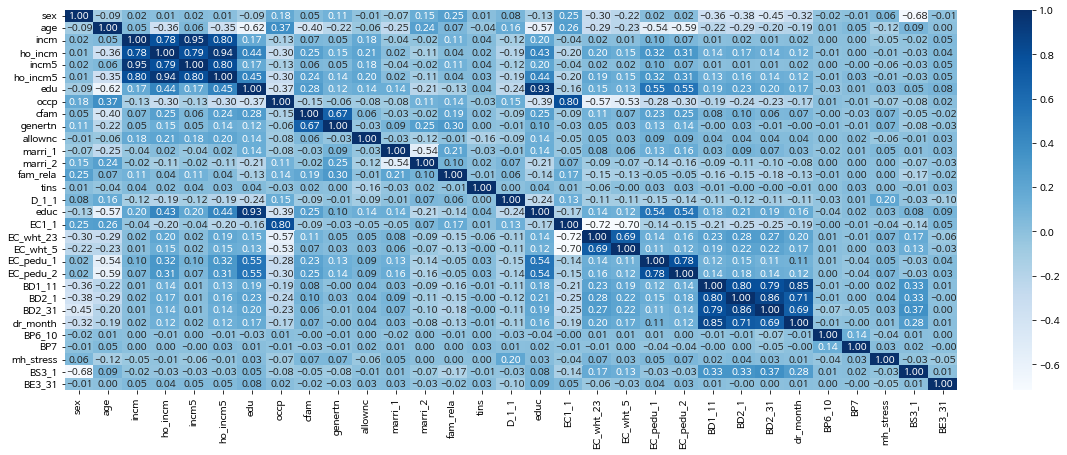

In [126]:
plt.figure(figsize=(20,7))
sns.heatmap(df_corr_not_e, annot=True, fmt=".2f", cmap="Blues")

[유년기 환경: 부모님 수준]이 [현재 교육수준: 학력]과 관련이 깊음       
독거노인의 경우는 관련 별로 없음